In [12]:
import h5py    
import numpy as np    
import pandas as pd
with h5py.File('milano.h5', 'r') as hdf:
    ls = list(hdf.keys())
    print("list of the dataset", ls)
    idx = hdf.get('idx')
    idx_arr = np.array(idx)
    print("shape of the idx data", idx_arr.shape)
    cell = hdf.get('cell')
    cell_arr = np.array(cell)
    print("shape of the cell data", cell_arr.shape)
    lat = hdf.get('lat')
    lat_arr = np.array(lat)
    print("shape of the lat data", lat_arr.shape)
    lng = hdf.get('lng')
    lng_arr = np.array(lng)
    print("shape of the lng data", lng_arr.shape)
    net = hdf.get('net')
    net_arr = np.array(net)
    print("shape of the net data", net_arr.shape)
    call = hdf.get('call')
    call_arr = np.array(call)
    print("shape of the call data", call_arr.shape)
    sms = hdf.get('sms')
    sms_arr = np.array(sms)
    print("shape of the sms data", sms_arr.shape)
    k_net_att = list(lng.attrs.keys())
    v_net_att = list(lng.attrs.values())

list of the dataset ['call', 'cell', 'idx', 'lat', 'lng', 'net', 'sms']
shape of the idx data (1344, 1)
shape of the cell data (9953,)
shape of the lat data (9953,)
shape of the lng data (9953,)
shape of the net data (1344, 10000)
shape of the call data (1344, 10000)
shape of the sms data (1344, 10000)


In [17]:
import pandas as pd
import h5py

with h5py.File('milano.h5', 'r') as file:
    data = file['lat'][:]

df = pd.DataFrame(data)
df.to_csv('dataverse_files/lat.csv', index=False)
print('done...')

done...


In [19]:
pd.DataFrame(net_arr)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,50.342,50.432,50.528,50.081,45.572,50.528,50.528,50.528,50.528,29.649,...,271.894,214.813,128.176,115.533,119.635,137.028,160.008,155.437,88.086,75.428
1,46.150,46.158,46.167,46.126,41.717,46.167,46.167,46.167,46.167,25.482,...,231.347,186.266,117.608,105.307,100.420,112.042,134.065,129.599,69.681,61.007
2,35.053,35.018,34.980,35.156,32.024,34.980,34.980,34.980,34.980,20.143,...,192.794,156.756,102.343,91.344,96.800,113.887,133.401,129.524,71.300,59.194
3,30.914,30.944,30.975,30.828,28.232,30.975,30.975,30.975,30.975,18.879,...,167.866,137.753,91.731,80.353,104.383,130.684,144.865,142.221,80.166,53.011
4,31.979,32.050,32.126,31.772,29.000,32.126,32.126,32.126,32.126,19.348,...,163.422,138.628,101.797,92.595,108.431,130.360,146.391,143.310,77.743,50.267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1339,78.386,78.745,79.127,77.345,69.743,79.127,79.127,79.127,79.127,44.631,...,344.132,261.897,137.470,122.002,167.677,214.142,238.199,233.750,139.438,105.380
1340,84.284,84.624,84.985,83.299,75.473,84.985,84.985,84.985,84.985,49.375,...,386.142,289.750,144.046,128.908,189.896,251.869,281.870,276.416,156.333,106.422
1341,75.675,76.026,76.401,74.656,68.248,76.401,76.401,76.401,76.401,47.490,...,333.839,249.105,121.344,108.053,174.319,267.220,332.435,320.175,146.527,104.689
1342,73.450,73.874,74.324,72.224,65.642,74.324,74.324,74.324,74.324,44.840,...,265.311,199.082,101.648,91.554,173.127,257.900,297.045,290.035,147.479,86.590


In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib
from matplotlib import pyplot as plt
import csv
from scipy import stats
import scipy.integrate as integrate
import scipy.special as sp
import seaborn as sns
import networkx as nx
import datetime
from scipy.stats import spearmanr
from datetime import timedelta
import datetime
import scipy
from datetime import datetime as dt

In [2]:
##Novembre..

In [7]:
for i in range(1,9):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-0{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-0{}.csv'.format(i), sep=';')


In [8]:
for i in range(0,9):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-1{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-1{}.csv'.format(i), sep=';')

In [9]:
for i in range(0,9):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-2{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-2{}.csv'.format(i), sep=';')

In [20]:
df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-19.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
df = df.set_index('datetime')
df = df.fillna(0)
df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-19.csv'.format(i), sep=';')

In [7]:
##Decembre...

In [8]:
for i in range(1,10):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-0{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-0{}.csv'.format(i), sep=';')

In [9]:
for i in range(0,10):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-1{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-1{}.csv'.format(i), sep=';')

In [10]:
for i in range(0,10):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-2{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-11-2{}.csv'.format(i), sep=';')

In [11]:
for i in range(0,2):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-3{}.txt'.format(i), sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
    df = df.set_index('datetime')
    df = df.fillna(0)
    df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
    df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-3{}.csv'.format(i), sep=';')

In [13]:
df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-20.txt', sep='\t', encoding="utf-8-sig", header=None, 
                 names=['squareid', 'datetime', 'countrycode', 'smsin','smsout','callin','callout','internet'],
                parse_dates=['datetime'], date_parser=lambda x: datetime.datetime.fromtimestamp(float(int(x)/1000.)))
df = df.set_index('datetime')
df = df.fillna(0)
df = df.groupby([pd.Grouper(freq='10Min'), 'squareid', 'countrycode']).sum()
df.to_csv('dataverse_files/sms-call-internet-mi-2013-12-20.csv', sep=';')

In [73]:
df_cdrs_nov = pd.DataFrame({})
for i in range(1,32):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-12-%d.csv'%i, sep=';', parse_dates=['datetime'])
    df_cdrs_nov = df_cdrs_nov.append(df)

df_cdrs_nov=df_cdrs_nov.fillna(0)    
df_cdrs_nov['sms'] = df_cdrs_nov['smsin'] + df_cdrs_nov['smsout']
df_cdrs_nov['calls'] = df_cdrs_nov['callin'] + df_cdrs_nov['callout']

/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_3174/220032004.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs_nov = df_cdrs_nov.append(df)


In [74]:
df_cdrs_nov = df_cdrs_nov[['datetime', 'squareid', 'internet', 'sms', 'calls']].groupby(['datetime', 'squareid'], as_index=False).sum()


In [77]:
df_cdrs_nov.to_csv('dataverse_files/sms-call-internet-mi-jan.csv', sep=';', index=False)

In [75]:
df_cdrs_nov.head()

,datetime,squareid,internet,sms,calls
0,2014-01-01,1,11.354392,9.924296,4.933850
1,2014-01-01,2,11.344809,10.070305,4.997122
2,2014-01-01,3,11.334607,10.225726,5.064473
3,2014-01-01,4,11.382150,9.501377,4.750580
4,2014-01-01,5,10.350482,8.880042,4.424844


In [76]:
df_cdrs_nov.tail()

,datetime,squareid,internet,sms,calls
1438696,2014-01-01 23:50:00,9996,24.024474,2.080500,0.129820
1438697,2014-01-01 23:50:00,9997,28.432498,2.763132,0.085995
1438698,2014-01-01 23:50:00,9998,27.588855,2.613061,0.085995
1438699,2014-01-01 23:50:00,9999,13.823244,0.914961,0.085995
1438700,2014-01-01 23:50:00,10000,9.401419,0.688798,0.085995


In [6]:
df_cdrs = pd.DataFrame({})
for i in range(1,16):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-11-{}.csv'.format(i), sep=';', parse_dates=['datetime'])
    df_cdrs = df_cdrs.append(df)
    
df_cdrs=df_cdrs.fillna(0)
df_cdrs['sms'] = df_cdrs['smsin'] + df_cdrs['smsout']
df_cdrs['calls'] = df_cdrs['callin'] + df_cdrs['callout']
df_cdrs.head()

df_cdrs_internet = df_cdrs[['datetime', 'squareid', 'internet', 'sms', 'calls']].groupby(['datetime', 'squareid'], as_index=False).sum()
df_cdrs_internet['hour'] = df_cdrs_internet.datetime.dt.hour+24*(df_cdrs_internet.datetime.dt.day-1)
df_cdrs_internet = df_cdrs_internet.set_index(['hour']).sort_index()

/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_13394/447700037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_13394/447700037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_13394/447700037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_13394/447700037.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5n

In [7]:
df_cdrs_internet.head()

,datetime,squareid,internet,sms,calls
hour,,,,,
0,2013-11-01,1,11.028366,0.380014,0.213213
0,2013-11-01,2,11.058225,0.369818,0.219658
0,2013-11-01,3,11.090008,0.358964,0.226519
0,2013-11-01,4,10.941881,0.409548,0.194543
0,2013-11-01,5,9.916548,0.380458,0.182593


In [8]:
df_cdrs_internet.tail()

,datetime,squareid,internet,sms,calls
hour,,,,,
359,2013-11-15 23:50:00,9996,40.391616,2.884470,0.628246
359,2013-11-15 23:50:00,9997,41.979429,3.270323,0.705662
359,2013-11-15 23:50:00,9998,41.370674,3.202326,0.692062
359,2013-11-15 23:50:00,9999,29.126174,1.979442,0.527219
359,2013-11-15 23:50:00,10000,27.043819,1.526531,0.579467


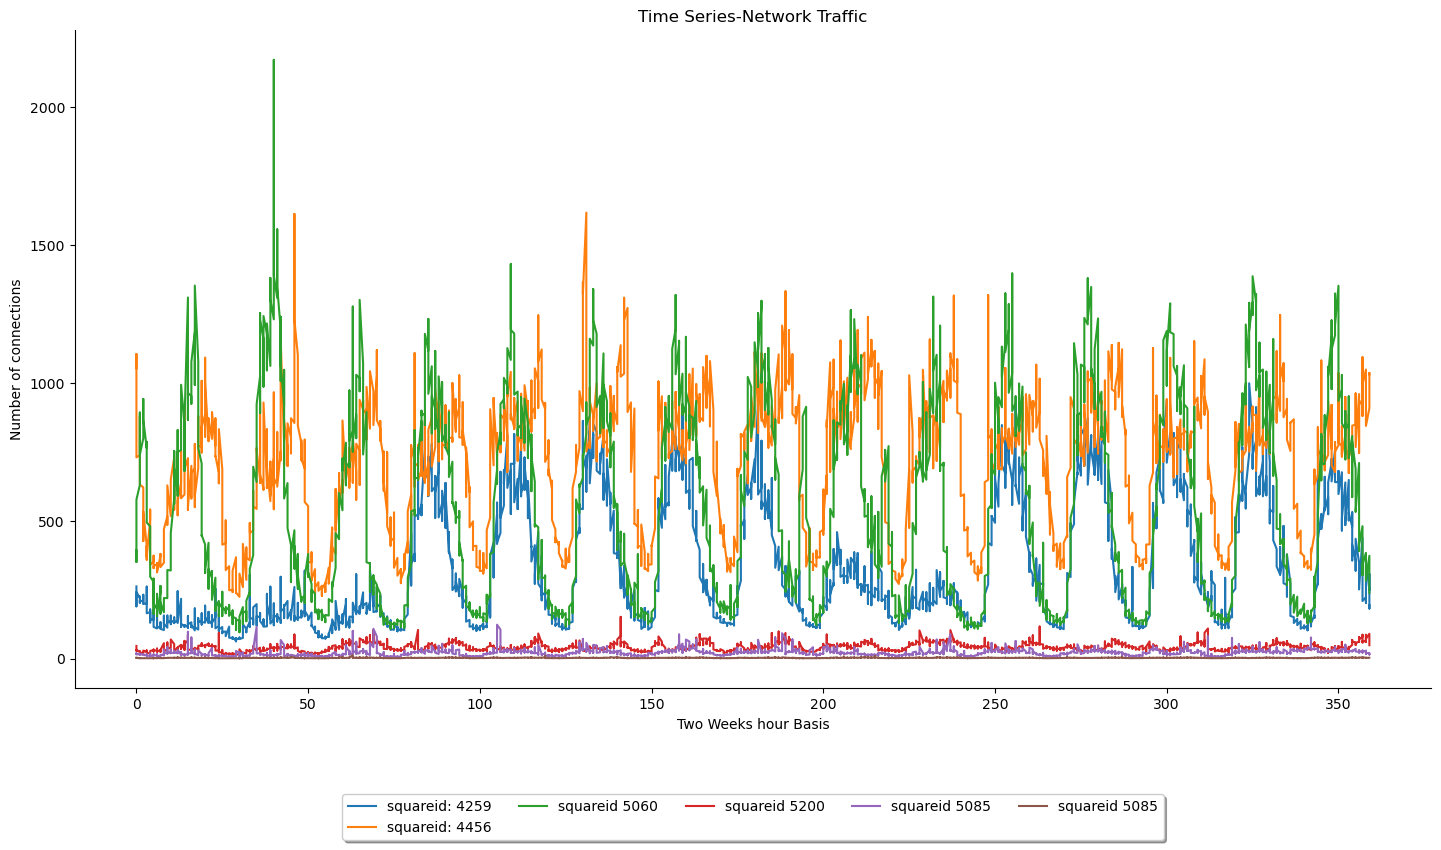

In [9]:
f = plt.figure()

ax = df_cdrs_internet[df_cdrs_internet.squareid==4259]['internet'].plot(label='squareid: 4259')
df_cdrs_internet[df_cdrs_internet.squareid==4456]['internet'].plot(ax=ax, label='squareid: 4456')
df_cdrs_internet[df_cdrs_internet.squareid==5060]['internet'].plot(ax=ax, label='squareid 5060')
df_cdrs_internet[df_cdrs_internet.squareid==5200]['internet'].plot(ax=ax, label='squareid 5200')
df_cdrs_internet[df_cdrs_internet.squareid==5085]['internet'].plot(ax=ax, label='squareid 5085')
df_cdrs_internet[df_cdrs_internet.squareid==4703]['internet'].plot(ax=ax, label='squareid 5085')


plt.xlabel("Two Weeks hour Basis")
plt.ylabel("Number of connections")
sns.despine()
plt.title('Time Series-Network Traffic') 
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17.5, 9.5, forward=True)
fig.savefig('dataverse_files/Telecom_Italia_Internet.pdf')

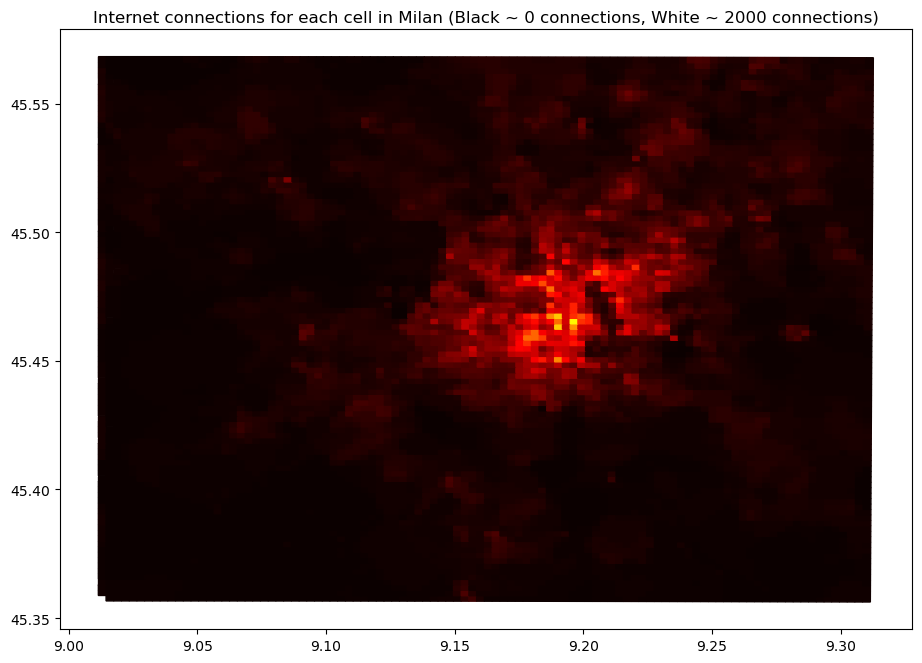

In [11]:
# Plotting the temporally averaged internet connections for each cell. Averaged over the entire week (Nov. 1-7).
import geojson
import matplotlib.colors as colors
import matplotlib.cm as cmx
#import matplotlib as mpl
from descartes import PolygonPatch

num = int(10000+1)
arr_cellID = np.zeros(num)
arr_mean = np.zeros(num)
for i in range(1,num):
    ydata = df_cdrs_internet[df_cdrs_internet.squareid==i]['internet']
    xdata = df_cdrs_internet[df_cdrs_internet.squareid==i]['internet'].index
    mean = np.mean(ydata)
    arr_cellID[i]=i
    arr_mean[i]=mean

arr_mean[arr_mean<=0] = 1 #replacing 0's with 1's for log calc
arr_mean_log = np.log(arr_mean)

with open("dataverse_files/milano-grid.geojson") as json_file:
    json_data = geojson.load(json_file)
    

fig = plt.figure() 
ax = fig.gca() 

coordlist = json_data.features[1]['geometry']['coordinates'][0]

jet = cm = plt.get_cmap('hot') 
#cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean))
cNorm  = colors.Normalize(vmin=0, vmax=2000)
#cNorm  = colors.Normalize(vmin=0, vmax=np.max(arr_mean_log))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
#print(scalarMap.get_clim())

for i in range(1,10000):
    poly = json_data.features[i]['geometry']
    colorVal = scalarMap.to_rgba(arr_mean[i])
    ax.add_patch(PolygonPatch(poly, fc=colorVal, ec=colorVal, alpha=1, zorder=1 ))
ax.axis('scaled')

fig.set_size_inches(11,11)
plt.title("Internet connections for each cell in Milan (Black ~ 0 connections, White ~ 2000 connections)")
plt.show()
fig.savefig('dataverse_files/Telecom_Italia_heatmap.pdf')

In [18]:
df_cdrs = pd.DataFrame({})
for i in range(1,8):
    df = pd.read_csv('dataverse_files/sms-call-internet-mi-2013-11-{}.csv'.format(i), sep=';', parse_dates=['datetime'])
    df_cdrs = df_cdrs.append(df)
    
df_cdrs=df_cdrs.fillna(0)
df_cdrs['sms'] = df_cdrs['smsin'] + df_cdrs['smsout']
df_cdrs['calls'] = df_cdrs['callin'] + df_cdrs['callout']
df_cdrs.head()

df_cdrs_internet = df_cdrs[['datetime', 'squareid', 'internet', 'sms', 'calls']].groupby(['datetime', 'squareid'], as_index=False).sum()
df_cdrs_internet['hour'] = df_cdrs_internet.datetime.dt.hour+24*(df_cdrs_internet.datetime.dt.day-1)
df_cdrs_internet = df_cdrs_internet.set_index(['hour']).sort_index()

/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_10748/338857069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_10748/338857069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_10748/338857069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5nb3td2g97gcfggy3xgxgr0000gp/T/ipykernel_10748/338857069.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_cdrs = df_cdrs.append(df)
/var/folders/8p/pm5n

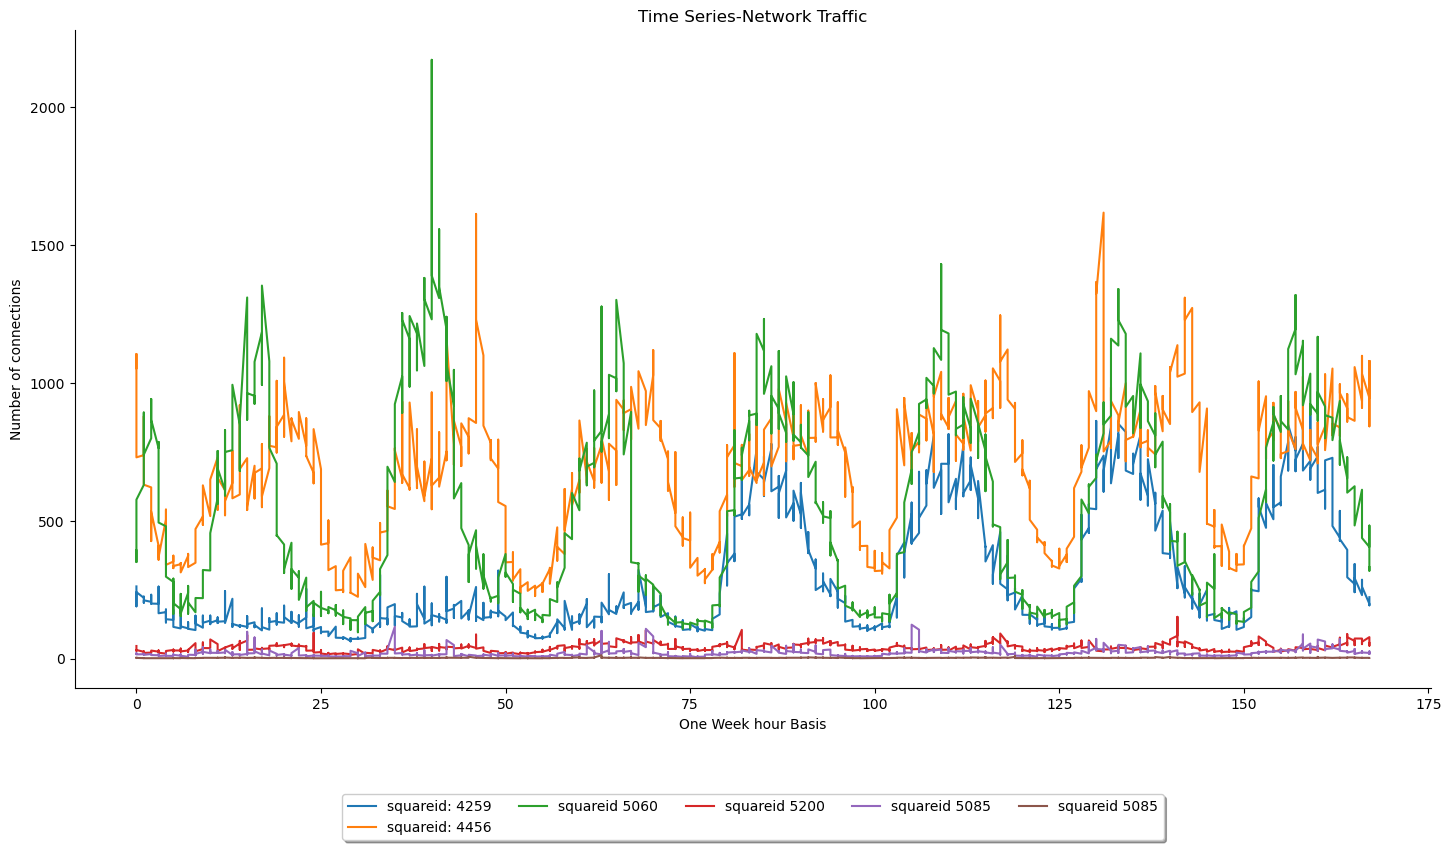

In [21]:
f = plt.figure()

ax = df_cdrs_internet[df_cdrs_internet.squareid==4259]['internet'].plot(label='squareid: 4259')
df_cdrs_internet[df_cdrs_internet.squareid==4456]['internet'].plot(ax=ax, label='squareid: 4456')
df_cdrs_internet[df_cdrs_internet.squareid==5060]['internet'].plot(ax=ax, label='squareid 5060')
df_cdrs_internet[df_cdrs_internet.squareid==5200]['internet'].plot(ax=ax, label='squareid 5200')
df_cdrs_internet[df_cdrs_internet.squareid==5085]['internet'].plot(ax=ax, label='squareid 5085')
df_cdrs_internet[df_cdrs_internet.squareid==4703]['internet'].plot(ax=ax, label='squareid 5085')


plt.xlabel("One Week hour Basis")
plt.ylabel("Number of connections")
sns.despine()
plt.title('Time Series-Network Traffic') 
# Shrink current axis's height by 10% on the bottom
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(17.5, 9.5, forward=True)
#fig.savefig('dataverse_files/Telecom_Italia_Internet.pdf')

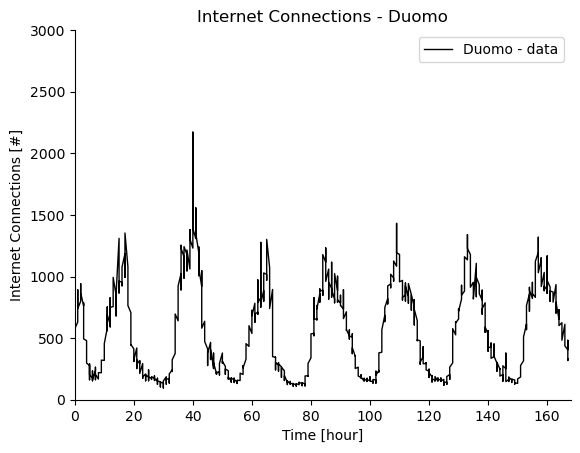

In [24]:
#Duomo (downtown) data
ydata = df_cdrs_internet[df_cdrs_internet.squareid==5060]['internet']
xdata = df_cdrs_internet[df_cdrs_internet.squareid==5060]['internet'].index

f = plt.figure()
plt.plot(xdata, ydata, color='black', linewidth=1, linestyle='-', label='Duomo - data')
plt.title("Internet Connections - Duomo")
plt.xlabel("Time [hour]")
plt.ylabel("Internet Connections [#]")
plt.xlim([0,168])
plt.ylim([0,3000])
plt.legend()
sns.despine()
plt.show()

In [18]:
import jovian
import geopandas as gpd
import pandas as pd
import seaborn as sns
import opendatasets as od
import matplotlib.pyplot as plt
import folium
from plotly.offline import iplot
import plotly.express as px
import datetime
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [20]:
province_boundary_gdf=gpd.read_file('dataverse_files/Italian_provinces.geojson')
province_boundary_gdf=province_boundary_gdf.to_crs("EPSG:4326")
#milano grid:
milano_grid_gdf=gpd.read_file('dataverse_files/milano-grid.geojson')

In [21]:
milano_province_boundary=province_boundary_gdf[province_boundary_gdf['PROVINCIA']=='Milano']

In [23]:
Milan_cells=gpd.sjoin(milano_grid_gdf,milano_province_boundary, how='inner', op='within')

/Users/onsaouedi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: FutureWarning:

The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.



In [24]:
Milan_cells 

,cellId,geometry,index_right,PROVINCIA,SIGLA,SHAPE_AREA
0,1,"POLYGON ((9.01149 45.35880, 9.01449 45.35880, ...",16,Milano,MI,1.574736e+09
1,2,"POLYGON ((9.01449 45.35880, 9.01749 45.35880, ...",16,Milano,MI,1.574736e+09
2,3,"POLYGON ((9.01749 45.35880, 9.02049 45.35880, ...",16,Milano,MI,1.574736e+09
3,4,"POLYGON ((9.02049 45.35880, 9.02349 45.35880, ...",16,Milano,MI,1.574736e+09
4,5,"POLYGON ((9.02349 45.35880, 9.02649 45.35880, ...",16,Milano,MI,1.574736e+09
...,...,...,...,...,...,...
9966,9967,"POLYGON ((9.21030 45.56802, 9.21331 45.56802, ...",16,Milano,MI,1.574736e+09
9967,9968,"POLYGON ((9.21331 45.56802, 9.21632 45.56801, ...",16,Milano,MI,1.574736e+09
9968,9969,"POLYGON ((9.21632 45.56801, 9.21933 45.56800, ...",16,Milano,MI,1.574736e+09
9969,9970,"POLYGON ((9.21933 45.56800, 9.22234 45.56800, ...",16,Milano,MI,1.574736e+09


In [21]:
l=[] #choosen cells on 20x20 grid
for i in range(4263,6173,100):
    #print(i)
    for j in range(i,i+20):
        #print(j)
        l.append(j)
#print(l)
#start creating 20*20 dataframe

4263
4363
4463
4563
4663
4763
4863
4963
5063
5163
5263
5363
5463
5563
5663
5763
5863
5963
6063
6163
[4263, 4264, 4265, 4266, 4267, 4268, 4269, 4270, 4271, 4272, 4273, 4274, 4275, 4276, 4277, 4278, 4279, 4280, 4281, 4282, 4363, 4364, 4365, 4366, 4367, 4368, 4369, 4370, 4371, 4372, 4373, 4374, 4375, 4376, 4377, 4378, 4379, 4380, 4381, 4382, 4463, 4464, 4465, 4466, 4467, 4468, 4469, 4470, 4471, 4472, 4473, 4474, 4475, 4476, 4477, 4478, 4479, 4480, 4481, 4482, 4563, 4564, 4565, 4566, 4567, 4568, 4569, 4570, 4571, 4572, 4573, 4574, 4575, 4576, 4577, 4578, 4579, 4580, 4581, 4582, 4663, 4664, 4665, 4666, 4667, 4668, 4669, 4670, 4671, 4672, 4673, 4674, 4675, 4676, 4677, 4678, 4679, 4680, 4681, 4682, 4763, 4764, 4765, 4766, 4767, 4768, 4769, 4770, 4771, 4772, 4773, 4774, 4775, 4776, 4777, 4778, 4779, 4780, 4781, 4782, 4863, 4864, 4865, 4866, 4867, 4868, 4869, 4870, 4871, 4872, 4873, 4874, 4875, 4876, 4877, 4878, 4879, 4880, 4881, 4882, 4963, 4964, 4965, 4966, 4967, 4968, 4969, 4970, 4971, 4972,